# Análisis sobre cada miembro del Chat

## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator

## Cargar Datos

In [2]:
df = pd.read_csv('../data/data_clear.csv')
df

,Date,Day,Num_Day,Month,Num_Month,Year,Time,Author,Message
0,20/11/2021,Sabado,20,Nov,11,2021,15:37:00,user 0,<Multimedia omitido>
1,20/11/2021,Sabado,20,Nov,11,2021,15:53:00,user 1,<Multimedia omitido>
2,20/11/2021,Sabado,20,Nov,11,2021,15:57:00,user 2,<Multimedia omitido>
3,20/11/2021,Sabado,20,Nov,11,2021,16:20:00,user 3,Buenas tardes!! Tienen el número de la carpint...
4,20/11/2021,Sabado,20,Nov,11,2021,16:26:00,user 4,<Multimedia omitido>
...,...,...,...,...,...,...,...,...,...
8257,29/04/2022,Viernes,29,Abr,4,2022,15:57:00,user 28,<Multimedia omitido>
8258,29/04/2022,Viernes,29,Abr,4,2022,17:11:00,user 0,<Multimedia omitido>
8259,29/04/2022,Viernes,29,Abr,4,2022,19:50:00,user 0,<Multimedia omitido>
8260,29/04/2022,Viernes,29,Abr,4,2022,20:03:00,user 14,<Multimedia omitido>


In [3]:
df['Words'] = df['Message'].apply(lambda s:len(s.split(' ')))
df

,Date,Day,Num_Day,Month,Num_Month,Year,Time,Author,Message,Words
0,20/11/2021,Sabado,20,Nov,11,2021,15:37:00,user 0,<Multimedia omitido>,2
1,20/11/2021,Sabado,20,Nov,11,2021,15:53:00,user 1,<Multimedia omitido>,2
2,20/11/2021,Sabado,20,Nov,11,2021,15:57:00,user 2,<Multimedia omitido>,2
3,20/11/2021,Sabado,20,Nov,11,2021,16:20:00,user 3,Buenas tardes!! Tienen el número de la carpint...,12
4,20/11/2021,Sabado,20,Nov,11,2021,16:26:00,user 4,<Multimedia omitido>,2
...,...,...,...,...,...,...,...,...,...,...
8257,29/04/2022,Viernes,29,Abr,4,2022,15:57:00,user 28,<Multimedia omitido>,2
8258,29/04/2022,Viernes,29,Abr,4,2022,17:11:00,user 0,<Multimedia omitido>,2
8259,29/04/2022,Viernes,29,Abr,4,2022,19:50:00,user 0,<Multimedia omitido>,2
8260,29/04/2022,Viernes,29,Abr,4,2022,20:03:00,user 14,<Multimedia omitido>,2


## Selección de Datos

Seleccionamos solo los registro que no tengan multimedias. Para ello, creamos un DataFrame con solo dichos registros

In [4]:
df_noMedia = df[df['Message'] != '<Multimedia omitido>']
df_noMedia.shape

(3486, 10)

## Importar funciones personalizadas

In [5]:
%run utils.ipynb

## Análisis de mensajes de cada miembro

In [6]:
# funcion que permite crear una nube de palabras al miembro pasado como parametro
def analysis_member(member:str):
    
    # dataframe con valores correspondientes al Author 27
    df_member = df_noMedia[df_noMedia['Author'] == member]

    # convertir los valores de la columna Message en un texto
    text = ' '.join(word for word in df_member.Message)

    # aplicando las funciones de limpieza
    text = delete_emoji(text)
    text = delete_tilde(text)
    text = remove_puntuation(text)
    text = regex_word(text)

    # nube de palabras
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

### Miembro 28

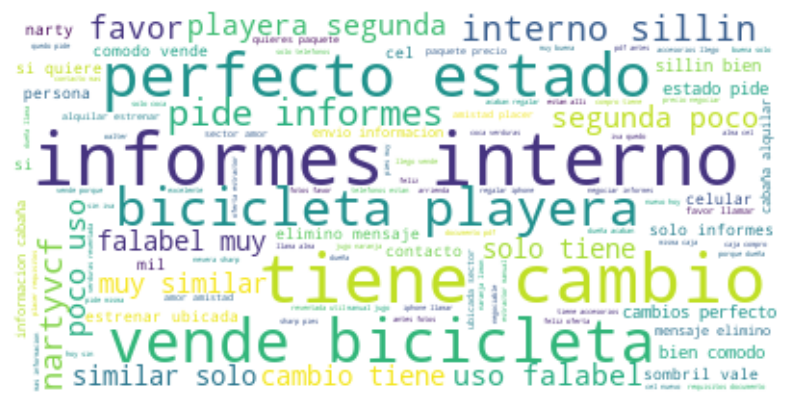

In [7]:
analysis_member('user 28')

### Miembro 22

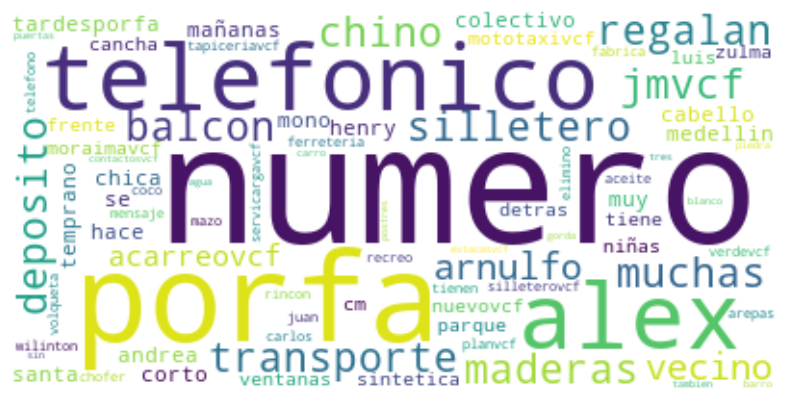

In [8]:
analysis_member('user 22')

### Miembro 185

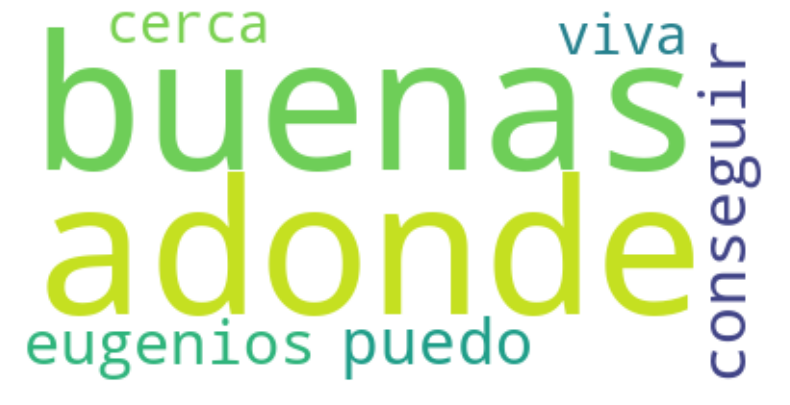

In [9]:
analysis_member('user 185')

### Miembro 7

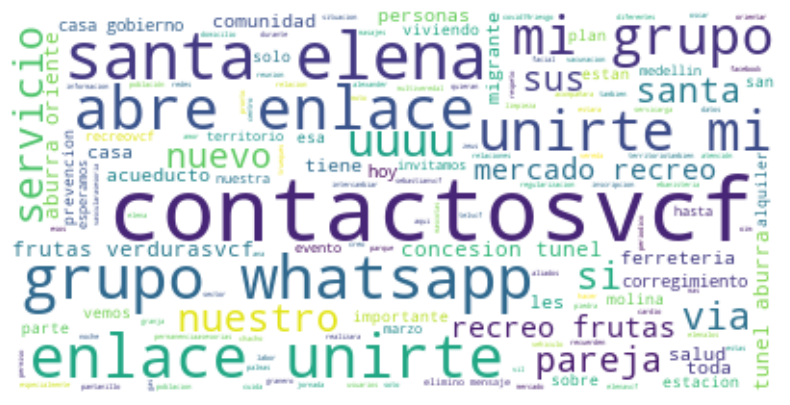

In [10]:
analysis_member('user 7')

## Línea de tiempo de cada miembro

In [11]:
def LineTime_Member(member:str):

    '''
    seleccion de los registros del usuario pasado como parametro
    '''
    # copiamos y seleccionamos los registros del miembro en un df nuevo
    df_member = df.copy(deep=True)
    df_member = df_member[(df_member['Author'] == member)]

    # convertimos las fechas en un objeto datetime
    df_member['Date'] = pd.to_datetime(df_member['Date'], format='%d/%m/%Y')

    # cambiamos el formatos de las fechas a Year-Month-Day para luego ordenar correctamente
    df_member['Date'] = df_member['Date'].dt.strftime('%Y-%m-%d')

    # agrupamos las fechas y su respectiva cantidad de mensajes y guardamos en un dataframe
    LineTime = df_member.groupby(['Date', 'Month', 'Num_Day']).count()['Message'].reset_index()

    # dataframe ordenado de mayor a menor segun la cantidad de mensajes
    LineTime_Order = LineTime.sort_values(by='Message', ascending=False).reset_index()

    '''
    Tabla con valores de interes
    '''
    # agregamos una nueva columna que indica si el mensaje es multimedia
    df_member['M_Multimedia'] = df_member['Message'].apply(lambda x: 1 if x == '<Multimedia omitido>' else 0)

    # creamos un DataFrame con el conteo total de message y mensajes multimedia
    df_table = df_member.groupby(['Date']).agg({'Message': 'count', 'M_Multimedia': 'sum'}).reset_index()

    # agregamos una nueva columna con el numero de mensajes que son texto
    df_table['M_Text'] = df_table['Message'] - df_table['M_Multimedia']

    # ordenamos el dataframe segun la cantidad de mensajes de mayor a menor
    table_sort = df_table.sort_values(by='Message', ascending=False).reset_index(drop=True).head()
     
    print(table_sort)
    
    '''
    Linea de tiempo del usuario seleccionado
    '''
    if table_sort.M_Text.sum() == 0:       
        print(f'El miembro {member} no envia mensajes de texto')
        
    else:
        plt.plot(LineTime['Date'], LineTime['Message'])
        plt.xticks(rotation=10, size=8.5)
        plt.yticks(rotation=0, size=8.5)
        colores = ['red', 'green', 'purple']

        if LineTime_Order.shape[0] > 2:
            for i in range(3):
                plt.scatter(
                LineTime_Order.Date[i], 
                LineTime_Order.Message[i], 
                label=str(str(LineTime_Order.Num_Day[i]) +' ' + LineTime_Order.Month[i]), 
                color = colores[i],
                marker='o')
            plt.xticks(np.arange(0, LineTime.shape[0], step=12))
            plt.title('3 dias de mayor actividad del miembro', fontsize=13, fontweight='bold')
            plt.legend()
        
        else:
            plt.xticks(np.arange(0, LineTime.shape[0], step=1))
            plt.title('Linea de tiempo del miembro', fontsize=13, fontweight='bold')
            
        plt.show()
    '''
    Creacion de Nubes de palabras para las 3 fechas con mayor cantidad
    de mensajes del usuario seleccionado
    '''
    if LineTime_Order.shape[0] > 2:
        num = 3
    else:
        num = LineTime_Order.shape[0]


    for i in range(num):
        # seleccion de la fecha dada
        fecha1 = LineTime_Order.Date[i]
        
        # variable con el numero de dia y nombre del mes de la fecha dada
        fecha_name = str(str(LineTime_Order.Num_Day[i]) + ' ' + LineTime_Order.Month[i])

        # dataframe con los valores de la fecha dada
        df_fecha = df_member[df_member.Date == fecha1]
        

        # dataframe con multimedia de una fecha dada
        df_media = df_fecha[df_fecha['Message'] == '<Multimedia omitido>']
        len_media = df_media.shape[0]

        # dataframe sin multimedia de una fecha dada
        df_nomedia = df_fecha[df_fecha['Message'] != '<Multimedia omitido>']
        len_nomedia = df_nomedia.shape[0]

        # crear nube de palabras para fechas con mensajes de texto
        if len_nomedia > 0: 
            Nube_Words(df_nomedia, fecha_name)
            
        else:
            print(f'En la fecha {fecha_name} no hubo mensajes de texto')
            continue

### Miembro 24

         Date  Message  M_Multimedia  M_Text
0  2021-12-14        5             4       1
1  2021-11-23        3             0       3
2  2021-12-08        3             0       3
3  2022-02-01        3             2       1
4  2021-11-21        2             0       2


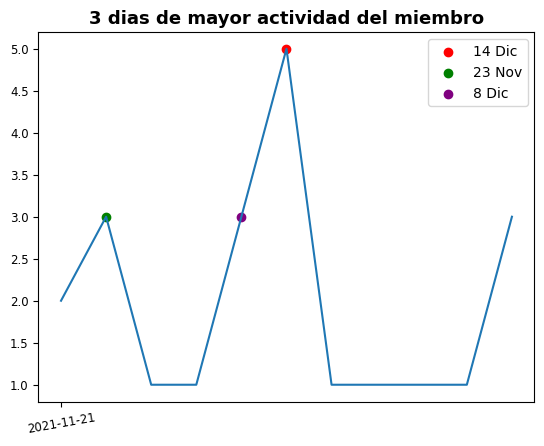

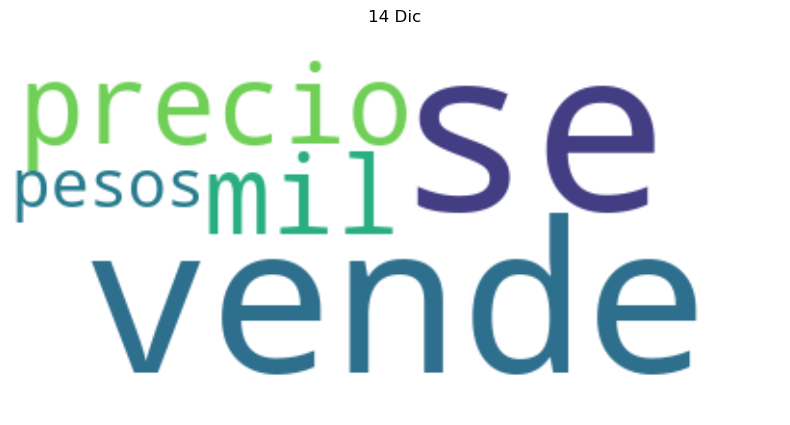

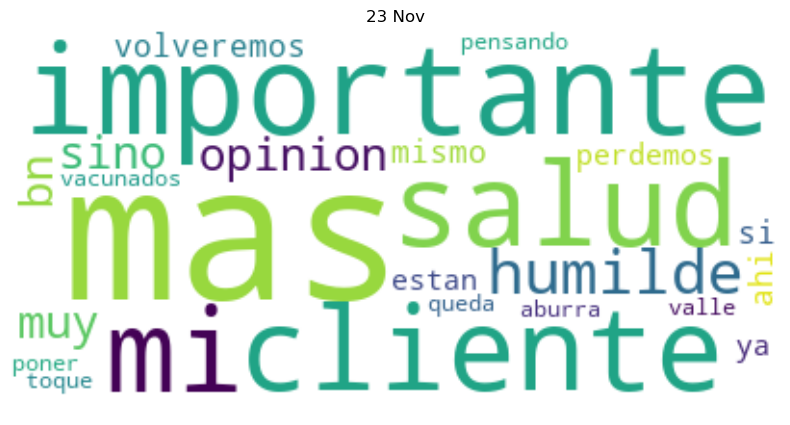

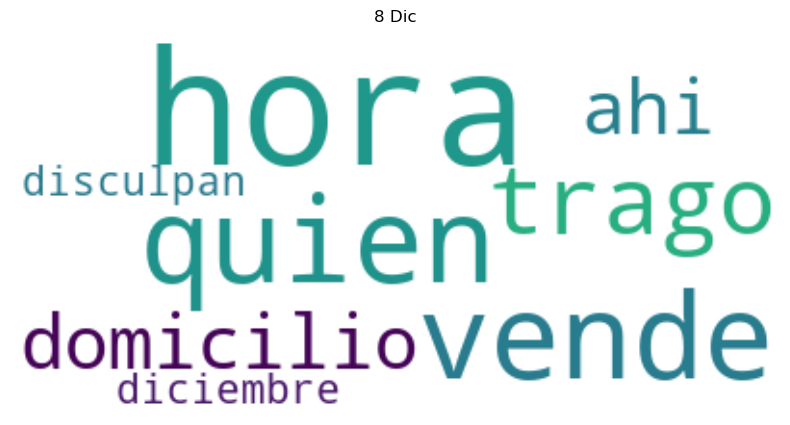

In [12]:
LineTime_Member('user 24')

### Miembro 4

         Date  Message  M_Multimedia  M_Text
0  2022-01-24        6             5       1
1  2022-01-23        3             3       0
2  2021-11-21        3             3       0
3  2021-11-28        3             3       0
4  2021-12-17        3             3       0


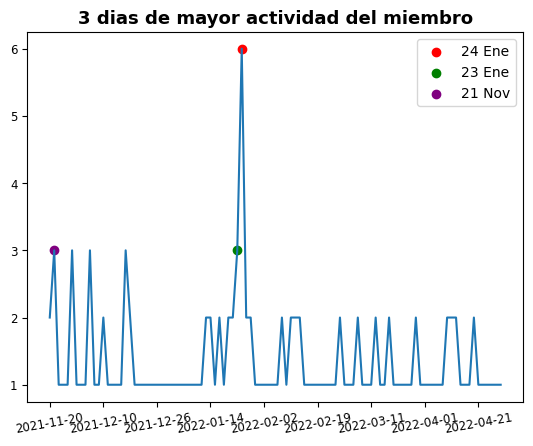

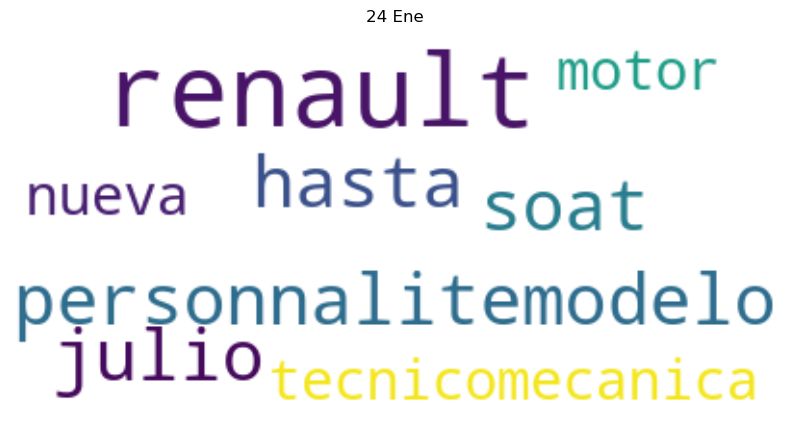

En la fecha 23 Ene no hubo mensajes de texto
En la fecha 21 Nov no hubo mensajes de texto


In [13]:
LineTime_Member('user 4')

### Miembro 7

         Date  Message  M_Multimedia  M_Text
0  2022-02-13       24             0      24
1  2022-04-18       14             0      14
2  2021-11-26       13             3      10
3  2021-12-12       11            11       0
4  2021-11-29        9             0       9


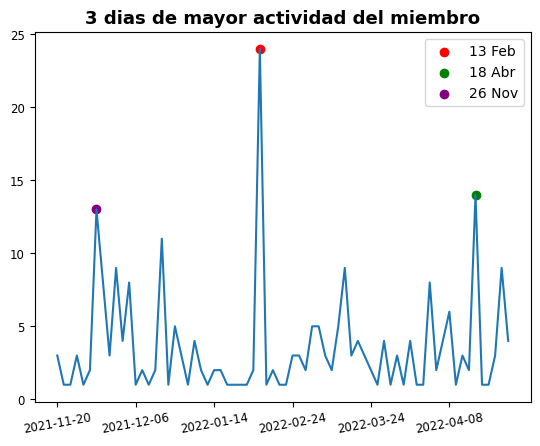

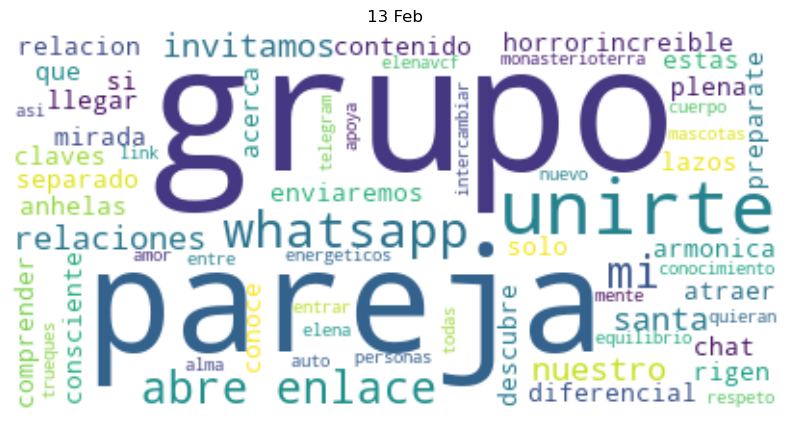

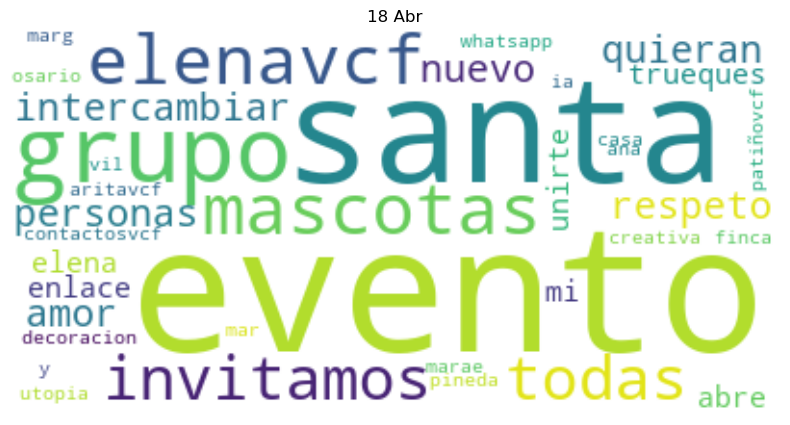

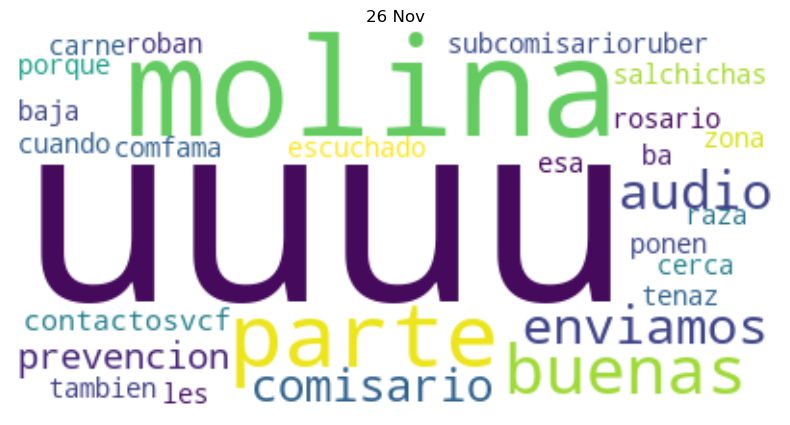

In [14]:
LineTime_Member('user 7')

### Mienbro 28

         Date  Message  M_Multimedia  M_Text
0  2022-02-09       41            37       4
1  2022-01-23       37            29       8
2  2022-04-29       36            25      11
3  2022-01-16       35            26       9
4  2022-01-18       32            26       6


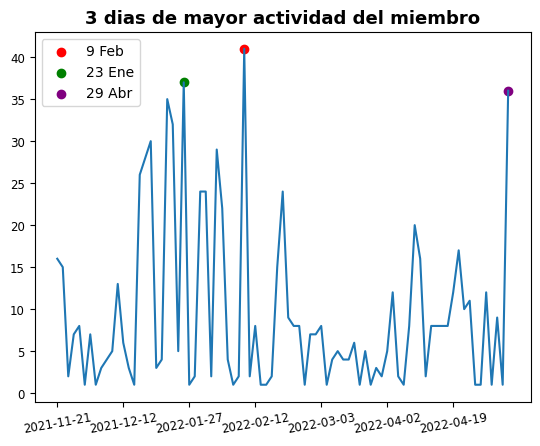

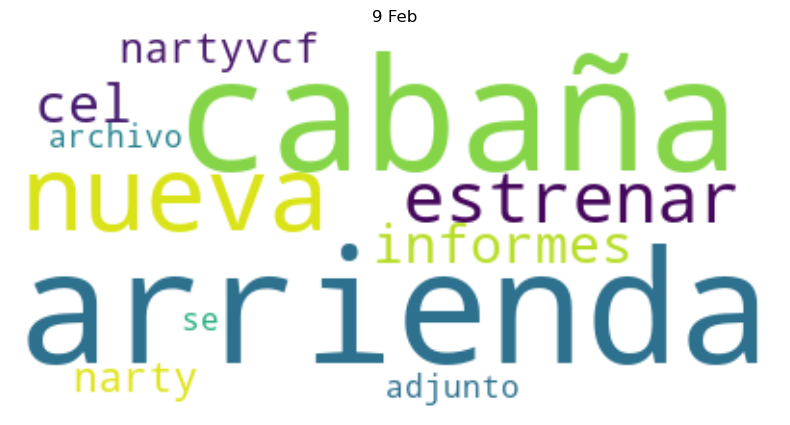

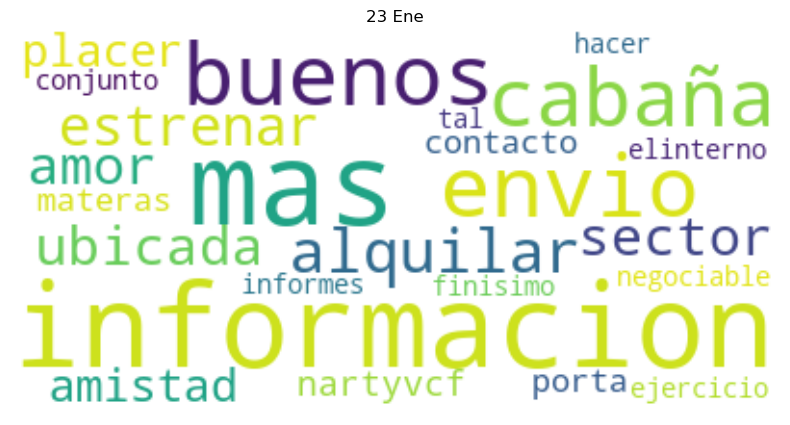

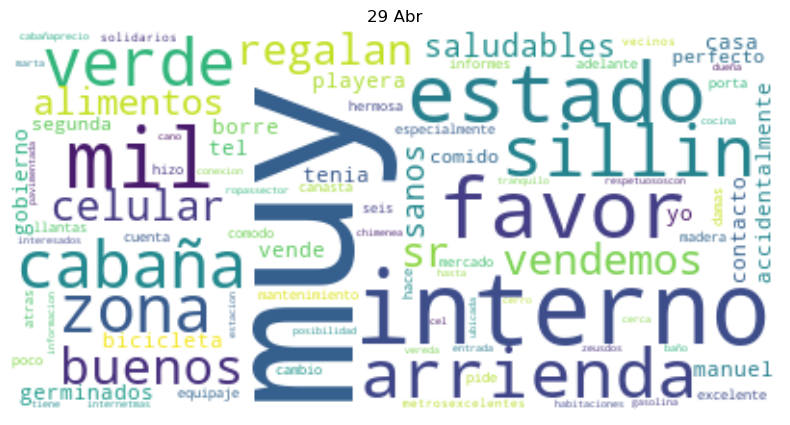

In [15]:
LineTime_Member('user 28')